In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#Sample size 
sample_size=10000

In [7]:
#simulate data, using M=2 predictor variables.
np.random.seed(42)
sim_data = np.random.normal((0, 0, 0), (1, 1, .5), size=(sample_size,3))

df = pd.DataFrame(sim_data, columns=["X1", "X2", "Error"])

#Create y in a new column using y=X1+X2+Error
df['Response']=df['X1']+df['X2']+df['Error']

#Create X and y
X=df[['X1', 'X2']].to_numpy()
y=df['Response'].to_numpy()

#Find RMSE of errors
def rmse(A,B):
    return((mean_squared_error(A,B))**(.5))


In [8]:
#Use this function because it's faster because it only splits once
def lm_rfr_mae_rmse(ts): #defines all four functions at once, so only splits once (to save time)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42) #split data
    rfr_model = RandomForestRegressor(random_state=42) #rfr model
    rfr_model.fit(X_train, y_train) #fit rfr
    rfr_pred = rfr_model.predict(X_test) #rfr predict
    rfr_mae = mean_absolute_error(rfr_pred, y_test) #rfr mae
    rfr_rmse = rmse(rfr_pred, y_test) #rfr rmse
    lm = LinearRegression() #lm
    lm.fit(X_train, y_train) #lm fit
    lm_pred=lm.predict(X_test) #lm predict
    lm_mae = mean_absolute_error(lm_pred, y_test) #lm mae
    lm_rmse = rmse(lm_pred, y_test) #lm rmse
    return(rfr_mae, rfr_rmse, lm_mae, lm_rmse)
    

In [13]:
#improved plotting method using my one single super-function
x=np.linspace(.01,.99,197)
A=np.vectorize(lm_rfr_mae_rmse)(x)
result1 = A[0] #RFR MAE
result2 = A[1] #RFR RMS
result3 = A[2] #LM MAE
result4 = A[3] #LM RMS


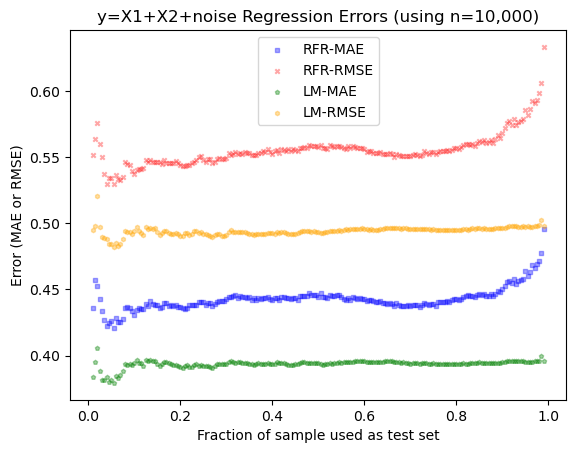

In [14]:
#plots my four errors
plt.scatter(x, result1, color='blue', label='RFR-MAE', s=10, marker='s', alpha=.35) #First dataset(set alpha=.5 for opacity)
plt.scatter(x, result2, color='red', label='RFR-RMSE', s=10, marker='x', alpha=.35)   # Second dataset
plt.scatter(x, result3, color='green', label='LM-MAE', s=10, marker='p', alpha=.35) #Third dataset
plt.scatter(x, result4, color='orange', label='LM-RMSE', s=10, marker='h', alpha=.35)   # Fourth dataset
# Adding labels and title
plt.xlabel('Fraction of sample used as test set')
plt.ylabel('Error (MAE or RMSE)')
plt.title('y=X1+X2+noise Regression Errors (using n=10,000)')

# Display a legend to distinguish between the datasets
plt.legend()

# Show the plot
plt.show()